# Single Stair Fitter

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

## Visualizing Input Data
The input data is given as the negative space of the surface of the stair step.

In [196]:
# Load the CSV file
file_path = "data/fuzzed2Gaussian.csv"  # Replace with your file path
data = pd.read_csv(file_path)

Input the dimensions of the step below: width, depth, and height.

In [198]:
max_x, max_y, max_h = 60, 20, 10  # Define your max values

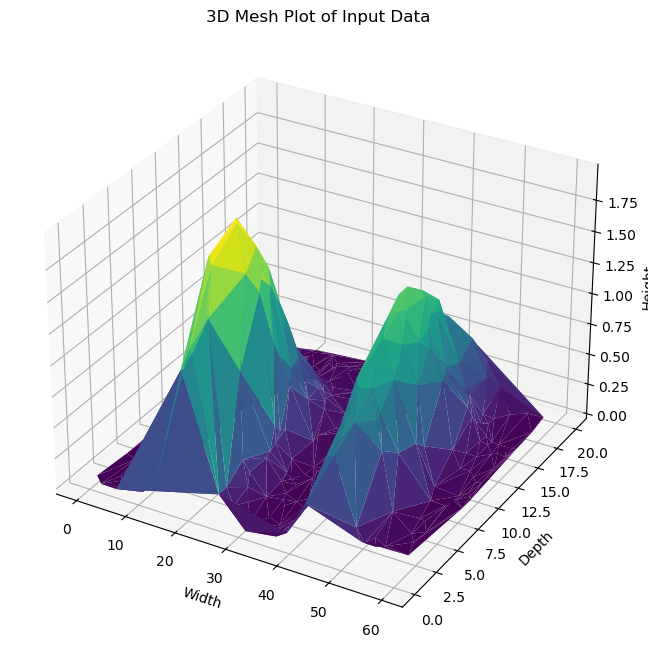

In [200]:
# Ensure the data satisfies the bounds
data = data[(data["X"] <= max_x) & (data["Y"] <= max_y) & (data["H"] <= max_h)]
X, Y, H = data['X'], data['Y'], data['H']

# Create a 3D mesh plot for visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, H, cmap="viridis", edgecolor="none")
ax.set_xlabel("Width")
ax.set_ylabel("Depth")
ax.set_zlabel("Height")
plt.title("3D Mesh Plot of Input Data")
plt.show()

# Stair Height
stair_height = 20
stair_H = stair_height - H

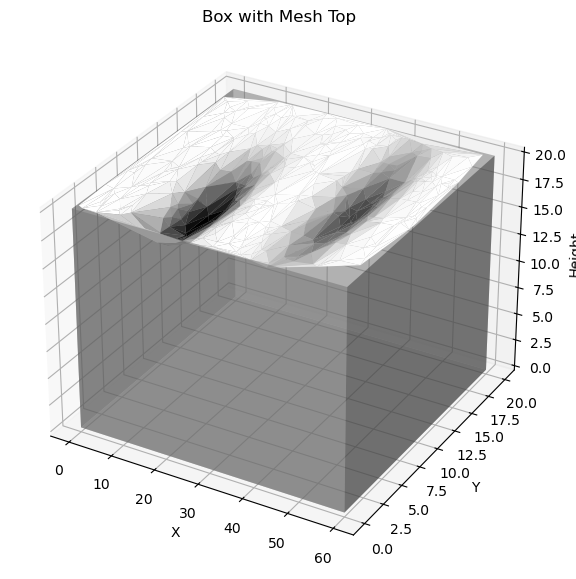

In [202]:
# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the box - bottom and four side walls
# Bottom rectangle (0,0,0) to (max_x, max_y, 0)
ax.plot_surface([[0, max_x], [0, max_x]], [[0, 0], [max_y, max_y]], np.zeros((2, 2)), color='gray', alpha=0.5)

# Side walls (4 vertical walls)
ax.plot_surface(np.array([[0, 0], [0, 0]]), np.array([[0, max_y], [0, max_y]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)
ax.plot_surface(np.array([[0, max_x], [0, max_x]]), np.array([[0, 0], [0, 0]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)
ax.plot_surface(np.array([[0, max_x], [0, max_x]]), np.array([[max_y, max_y], [max_y, max_y]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)
ax.plot_surface(np.array([[max_x, max_x], [max_x, max_x]]), np.array([[0, max_y], [0, max_y]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)

# Top mesh surface (X, Y, stair_H)
ax.plot_trisurf(X, Y, stair_H, cmap='gray', edgecolor='none')

# Set labels
ax.set_title('Box with Mesh Top')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Height')

plt.show()

## Fitting Data
This fits the data to n Gaussian distributions.

In [213]:
n_gaussians = 2

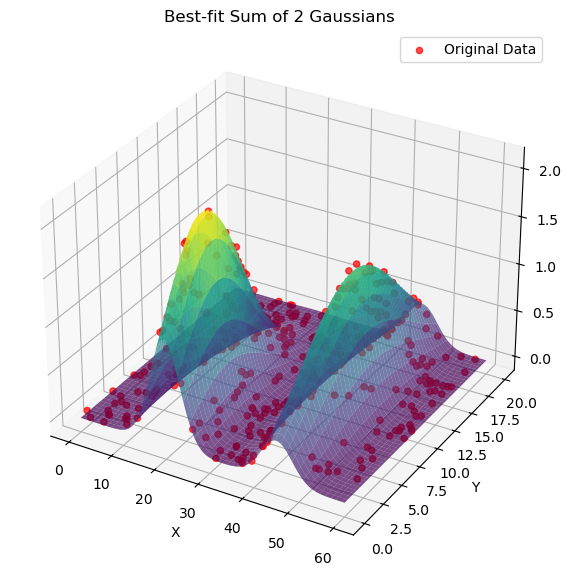

In [215]:
# Function to model a single 2D Gaussian distribution
def gaussian_2d(xy, x0, y0, sigma_x, sigma_y, amplitude):
    x, y = xy
    return amplitude * np.exp(-(((x - x0)**2) / (2 * sigma_x**2) + ((y - y0)**2) / (2 * sigma_y**2)))

# Function to model a sum of n_gaussians 2D Gaussian distributions
def sum_of_gaussians(xy, *params):
    n_gaussians = len(params) // 5
    result = np.zeros_like(xy[0])
    for i in range(n_gaussians):
        x0, y0, sigma_x, sigma_y, amplitude = params[i*5:(i+1)*5]
        result += gaussian_2d(xy, x0, y0, sigma_x, sigma_y, amplitude)
    return result

# Initial parameter guesses (randomly distributed means, variances, and amplitudes)
initial_params = []
for _ in range(n_gaussians):
    initial_params += [
        np.random.uniform(0, max_x),  # x0
        np.random.uniform(0, max_y),  # y0
        np.random.uniform(0.1, max_x / 4),  # sigma_x
        np.random.uniform(0.1, max_y / 4),  # sigma_y
        np.random.uniform(0, max_h)  # amplitude
    ]

# Fit the data to the sum of Gaussians
xy = np.vstack((X, Y))
params, _ = curve_fit(sum_of_gaussians, xy, H, p0=initial_params)

# Generate a mesh for visualization
x_mesh = np.linspace(0, max_x, 100)
y_mesh = np.linspace(0, max_y, 100)
X_mesh, Y_mesh = np.meshgrid(x_mesh, y_mesh)
xy_mesh = np.vstack((X_mesh.ravel(), Y_mesh.ravel()))

# Calculate the best-fit surface values
H_fit = sum_of_gaussians(xy_mesh, *params).reshape(100, 100)

# Plot the results
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data points
ax.scatter(X, Y, H, color='red', label='Original Data', alpha=0.7)

# Plot the best-fit Gaussian surface
ax.plot_surface(X_mesh, Y_mesh, H_fit, cmap='viridis', alpha=0.7)

# Set labels and title
ax.set_title(f'Best-fit Sum of {n_gaussians} Gaussians')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('H')
ax.legend()

plt.show()

In [217]:
stair_H_fit = stair_height - H_fit

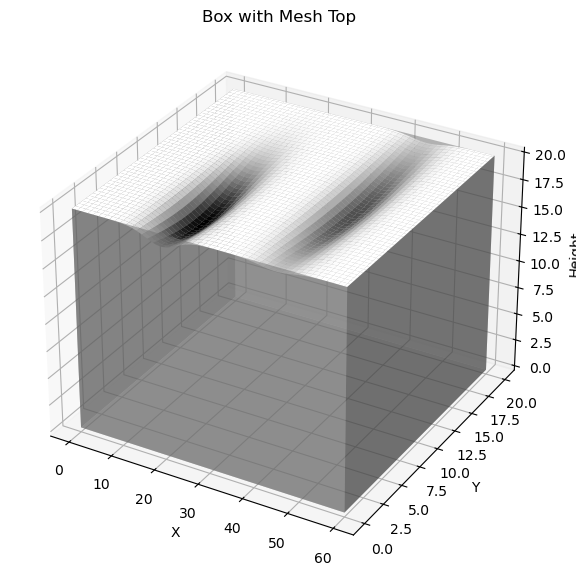

In [227]:
# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the box - bottom and four side walls
# Bottom rectangle (0,0,0) to (max_x, max_y, 0)
ax.plot_surface([[0, max_x], [0, max_x]], [[0, 0], [max_y, max_y]], np.zeros((2, 2)), color='gray', alpha=0.5)

# Side walls (4 vertical walls)
ax.plot_surface(np.array([[0, 0], [0, 0]]), np.array([[0, max_y], [0, max_y]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)
ax.plot_surface(np.array([[0, max_x], [0, max_x]]), np.array([[0, 0], [0, 0]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)
ax.plot_surface(np.array([[0, max_x], [0, max_x]]), np.array([[max_y, max_y], [max_y, max_y]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)
ax.plot_surface(np.array([[max_x, max_x], [max_x, max_x]]), np.array([[0, max_y], [0, max_y]]), np.array([[0, 0], [stair_height, stair_height]]), color='gray', alpha=0.5)

# Top mesh surface (x_grid, y_grid, stair_H)
ax.plot_surface(X_mesh, Y_mesh, stair_H_fit, cmap='gray', edgecolor='none')

# Set labels
ax.set_title('Box with Mesh Top')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Height')

plt.show()

In [229]:
params

array([19.96877123,  5.00935613, -3.46377187, -4.48640249,  2.06554738,
       44.99648874,  9.97812574, -3.46345527,  6.34235842,  1.44834014])